In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
input_file=('cadence_field1000.csv')

In [4]:
df=pd.read_csv(input_file,index_col=False)

In [5]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


In [6]:
df.describe()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
count,912.000000,9.120000e+02,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.0
mean,455.500000,1.353989e+06,1996.481360,1.725118e+08,61576.664671,1.216682,0.946423,0.135965,19.480077,23.071331,0.652962,0.0
std,263.416021,6.749863e+05,1006.667221,8.697478e+07,1006.652540,0.134956,0.205151,0.198053,1.784550,1.057774,0.201697,0.0
min,0.000000,1.276330e+05,173.000000,1.496519e+07,59753.208268,1.010873,0.550999,0.000000,16.332019,20.909705,0.212684,0.0
25%,227.750000,8.365668e+05,1223.000000,1.056970e+08,60803.345134,1.095562,0.786528,0.000000,17.300000,22.118978,0.506298,0.0
50%,455.500000,1.387090e+06,2030.500000,1.754551e+08,61610.730403,1.212443,0.906078,0.000000,19.965937,23.207572,0.618785,0.0
75%,683.250000,1.897182e+06,2798.000000,2.417535e+08,62378.073410,1.342497,1.080563,0.250000,21.104146,23.995230,0.769933,0.0
max,911.000000,2.434258e+06,3627.000000,3.133765e+08,63207.043279,1.503813,1.501938,0.625000,22.237331,24.919995,1.456743,0.0


# Spread of filter among nights

In [7]:
df1=df[['nights','filter']]

In [8]:
#df1

In [9]:
nbins=df1.nights.max()-df1.nights.min()

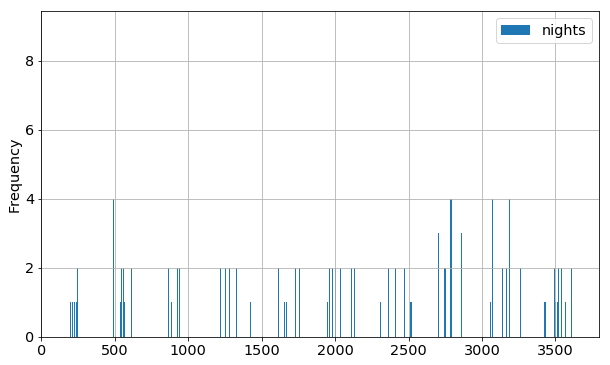

In [10]:
df1.plot.hist('nights',bins=nbins,grid=True)

# Plot Variable among filters

In [20]:
def PlotCadenceVariableForFilters(df,varname,nbins=50,theglobaltitle='title',thextitle='thextitle'):
    
    f, axarr = plt.subplots(2, 3,figsize=(15,8))
    
    #df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

    dfu=df.loc[df['filter']=='u']
    m,sig,c=dfu[varname].describe()['mean'],dfu[varname].describe()['std'],dfu[varname].describe()['count']
    
    thetitle='filt u m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfu[varname].values
    axarr[0, 0].hist(x,bins=nbins,color='blue')
    axarr[0, 0].set_title(thetitle)
    axarr[0, 0].set_xlabel(thextitle)
    axarr[0, 0].grid(True)
    
    dfg=df.loc[df['filter']=='g']
    m,sig,c=dfg[varname].describe()['mean'],dfg[varname].describe()['std'],dfg[varname].describe()['count']
    thetitle='filt g : m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfg[varname].values
    axarr[0, 1].hist(x,bins=nbins,color='green')
    axarr[0, 1].set_title(thetitle)
    axarr[0, 1].set_xlabel(thextitle)
    axarr[0, 1].grid(True)
    
    dfr=df.loc[df['filter']=='r']
    m,sig,c=dfr[varname].describe()['mean'],dfr[varname].describe()['std'],dfr[varname].describe()['count']
    thetitle='filt r : m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfr[varname].values
    axarr[0, 2].hist(x,bins=nbins,color='red')
    axarr[0, 2].set_title(thetitle)
    axarr[0, 2].set_xlabel(thextitle)
    axarr[0, 2].grid(True)
    
    dfi=df.loc[df['filter']=='i']
    m,sig,c=dfi[varname].describe()['mean'],dfi[varname].describe()['std'],dfi[varname].describe()['count']
    thetitle='filt i : m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfi[varname].values
    axarr[1, 0].hist(x,bins=nbins,color='orange')
    axarr[1, 0].set_title(thetitle)
    axarr[1, 0].set_xlabel(thextitle)
    axarr[1, 0].grid(True)
    
    dfz=df.loc[df['filter']=='z']
    m,sig,c=dfz[varname].describe()['mean'],dfz[varname].describe()['std'],dfz[varname].describe()['count']
    thetitle='filt z : m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfz[varname].values
    axarr[1, 1].hist(x,bins=nbins,color='black')
    axarr[1, 1].set_title(thetitle)
    axarr[1, 1].set_xlabel(thextitle)
    axarr[1, 1].grid(True)
    
    dfy=df.loc[df['filter']=='y']
    m,sig,c=dfy[varname].describe()['mean'],dfy[varname].describe()['std'],dfy[varname].describe()['count']
    thetitle='filt y : m={:2.2f} $\sigma=$ {:2.2f} c={}'.format(m,sig,c)
    x=dfy[varname].values
    axarr[1, 2].hist(x,bins=nbins,color='grey')
    axarr[1, 2].set_title(thetitle)
    axarr[1, 2].set_xlabel(thextitle)
    axarr[1, 2].grid(True)
    
      
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.3   # the amount of width reserved for blank space between subplots
    hspace = 0.3   # the amount of height reserved for white space between subplots
    f.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=wspace)
    
    f.suptitle(theglobaltitle,fontsize=20,fontweight='bold')

# Sky Background

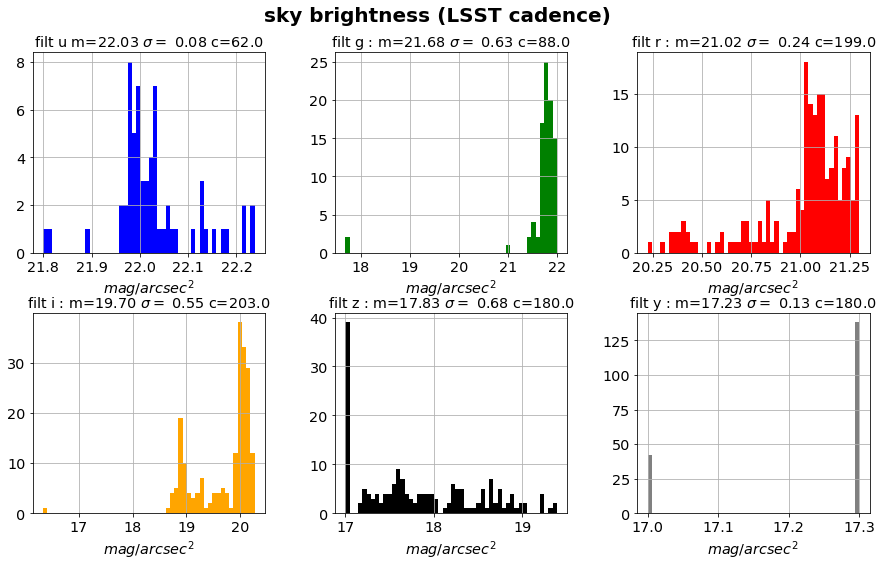

In [21]:
PlotCadenceVariableForFilters(df,'filtskybrightness',theglobaltitle='sky brightness (LSST cadence)',thextitle='$mag/arcsec^2$')

# Seeing

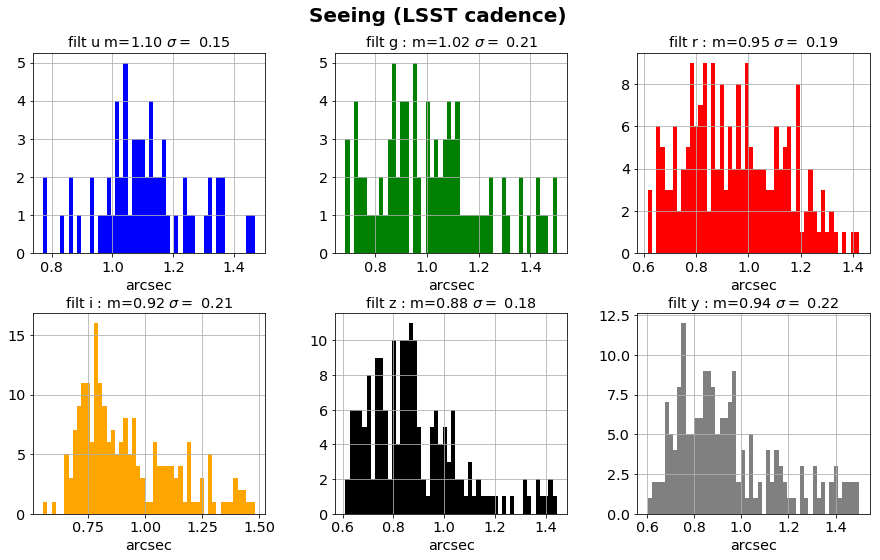

In [13]:
PlotCadenceVariableForFilters(df,'finseeing',theglobaltitle='Seeing (LSST cadence)',thextitle='arcsec')

# Five Sigma Depth

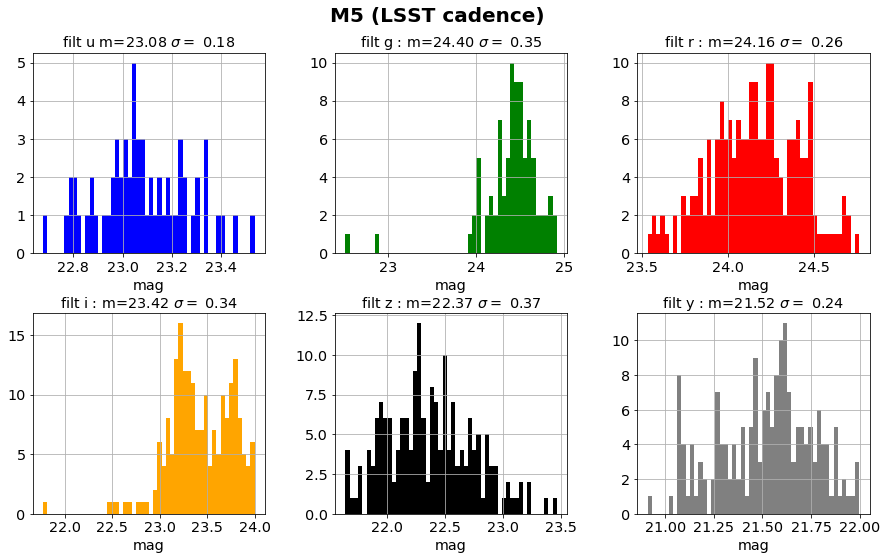

In [14]:
PlotCadenceVariableForFilters(df,'fiveSigmaDepth',theglobaltitle='M5 (LSST cadence)',thextitle='mag')

# Transparency

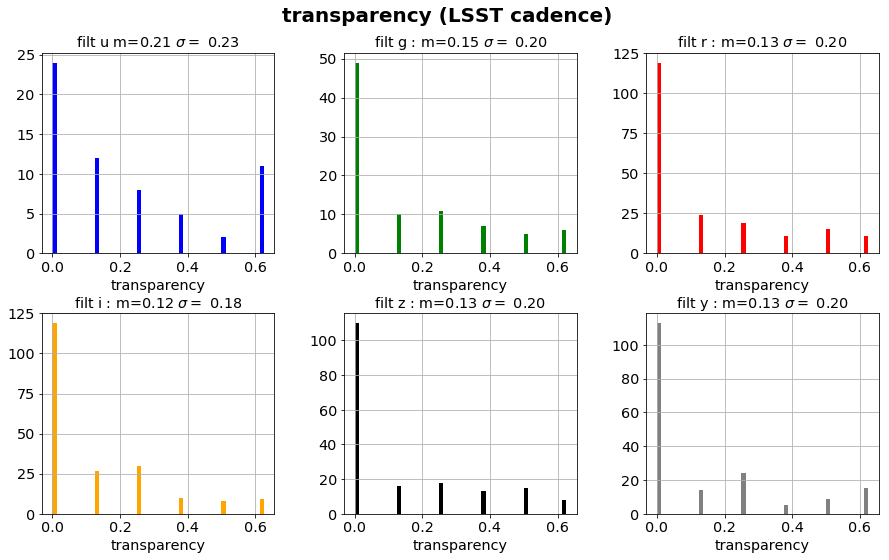

In [15]:
PlotCadenceVariableForFilters(df,'transparency',theglobaltitle='transparency (LSST cadence)',thextitle='transparency')